In [30]:
import pandas as pd
import seaborn as sns

In [7]:
ratings = pd.read_csv('data/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [8]:
print(f"Reviews: {len(ratings)}")
print(f"Users: {len(ratings['userId'].unique())}")

Reviews: 26024289
Users: 270896


In [10]:
movies = pd.read_csv('data/movies_metadata.csv')
movies.head()

/var/folders/sn/hvdpnw3n7l35_lcfs2ppcb_80000gn/T/ipykernel_83761/3726031263.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv('data/movies_metadata.csv')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


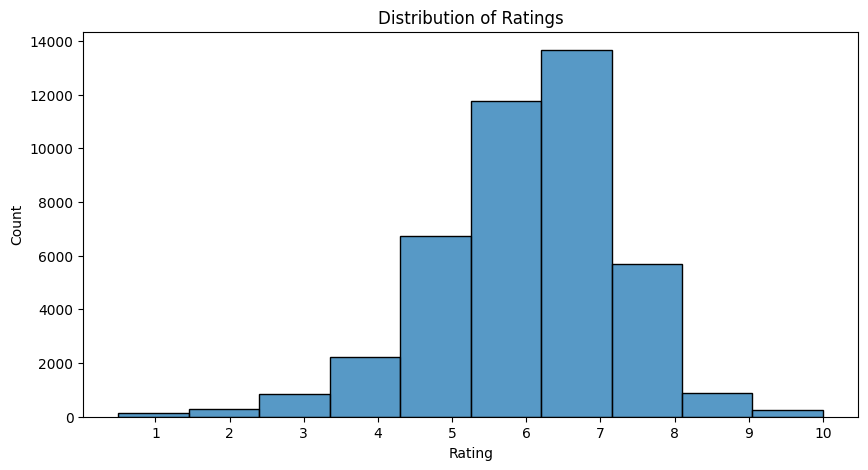

In [39]:
# histogram of ratings
movies = movies[movies['vote_average'] > 0]
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.histplot(movies['vote_average'], bins=10, kde=False)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.show()

In [ ]:
print(f"Movies: {len(movies)}")
# print number of movies with less than 10 reviews
print(f"Movies with less than 10 reviews: {len(movie_review_counts[movie_review_counts < 10])}")
# convert release_date to datetime
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')
# print earliest and latest release date
print(f"Earliest release date: {movies['release_date'].min()}")
print(f"Latest release date: {movies['release_date'].max()}")

Movies: 45466
Movies with less than 10 reviews: 23856
Earliest release date: 1874-12-09 00:00:00
Latest release date: 2020-12-16 00:00:00


In [19]:
# display the dataset ordered by release date
movies.sort_values('release_date', ascending=False).head(10)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
26559,False,"{'id': 87096, 'name': 'Avatar Collection', 'po...",0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,76600,tt1630029,en,Avatar 2,A sequel to Avatar (2009).,...,2020-12-16,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",In Production,NaN,Avatar 2,False,0.0,58.0
38885,False,NaN,12000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,299782,tt0069049,en,The Other Side of the Wind,"Orson Welles' unfinished masterpiece, restored...",...,2018-12-31,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,The Other Side of the Wind,False,0.0,1.0
30402,False,"{'id': 14890, 'name': 'Bad Boys Collection', '...",0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,38700,tt1502397,en,Bad Boys for Life,The continuing adventures of Miami detectives ...,...,2018-11-07,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Planned,NaN,Bad Boys for Life,False,0.0,12.0
38130,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,332283,tt3906082,en,Mary Shelley,The love affair between poet Percy Shelley and...,...,2018-04-25,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,Mary Shelley,False,0.0,1.0
44535,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,412059,tt5613402,en,Mobile Homes,"In forgotten towns along the American border, ...",...,2018-04-04,0.0,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,Mobile Homes,False,0.0,1.0
33359,False,"{'id': 312977, 'name': 'Iron Sky Collection', ...",18000000,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",http://www.ironsky.net/,302349,tt3038708,en,Iron Sky: The Coming Race,"Twenty years after the events of Iron Sky, the...",...,2018-03-01,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Post Production,NaN,Iron Sky: The Coming Race,False,0.0,0.0
33358,False,NaN,0,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",http://www.slycoopermovie.com,252983,tt3498786,en,Sly Cooper,Sly Cooper is a kinetic and comedic heist film...,...,2017-12-31,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",In Production,NaN,Sly Cooper,False,0.0,0.0
30536,False,NaN,0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",NaN,245842,tt2328678,en,The King's Daughter,King Louis XIV's quest for immortality leads h...,...,2017-12-30,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,What on Earth Can Hold More Power Than a King?,The King's Daughter,False,0.0,4.0
44301,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,341689,tt3859310,en,How to Talk to Girls at Parties,"A couple of British 1970s teen-aged boys, Enn ...",...,2017-12-27,0.0,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Some girls are out of this world.,How to Talk to Girls at Parties,False,0.0,10.0
33370,False,"{'id': 306031, 'name': 'Pitch Perfect Collecti...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,353616,tt4765284,en,Pitch Perfect 3,Sequel to Pitch Perfect 2,...,2017-12-21,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",In Production,NaN,Pitch Perfect 3,False,0.0,3.0


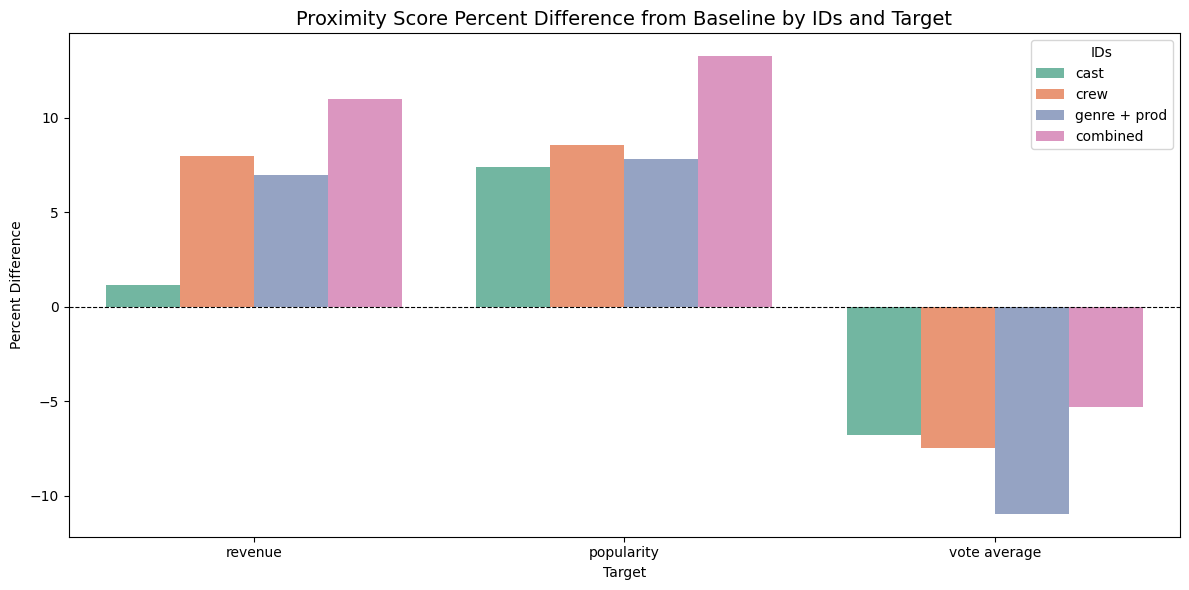

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv("test_results.csv")

# Calculate proximity % change
df["proximity_pct"] = (df["test prox"] - df["base prox"]) / df["base prox"] * 100

# Plot proximity change
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df,
    x="target", y="proximity_pct", hue="ids",
    palette="Set2", errorbar=None
)
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.title("Proximity Score Percent Difference from Baseline by IDs and Target", fontsize=14)
plt.ylabel("Percent Difference")
plt.xlabel("Target")
plt.legend(title="IDs")
plt.tight_layout()
plt.show()
